<a href="https://colab.research.google.com/github/LiscaAngriani/APM_Kelompok3/blob/main/Multiple_Regresi_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("bmi.csv")

In [3]:
dataset.head()

,Gender,Height,Weight,Index,bmi
0,Male,174,96,4,31.708284
1,Male,189,87,2,24.355421
2,Female,185,110,4,32.140248
3,Female,195,104,3,27.350427
4,Male,149,61,3,27.476240


In [4]:
#Setting the value for X and Y
x = dataset[['Height', 'Weight', 'Index']]
y = dataset['bmi']

In [5]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [6]:
!pip install LinearRegression

In [7]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [8]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficient:")
list(zip(x, mlr.coef_))

Intercept:  90.76543029933077
Coefficient:


[('Height', -0.5316393846559995),
 ('Weight', 0.4302400145738282),
 ('Index', -2.195943523872085)]

In [9]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predict values
print("Prediction set: {}".format(y_pred_mlr))

Prediction set: [37.35625756 50.01874504 46.10012908 41.08056249 27.6881785  38.85543481
 63.36184396 28.56875945 19.75944803 39.28567483 44.33978478 18.23391586
 48.19638561 21.02269631 38.21956682 61.76692581 41.13438917 42.07728451
 23.17106715 49.15826501  8.07611164 48.02388787 54.52677316 40.00001204
 29.96824971 24.36604629 39.10186016 52.07137498 38.45266657 16.31015706
 34.82693178 30.92387511 15.51906302 30.34920466 25.25288124 34.85157431
 43.71582926 20.8445401  39.84478598 41.21680448 30.09712085 40.93270728
 40.25038346 25.20359617 41.3544596  27.3083404  17.49947774 35.13395912
 34.47910706 28.72056074 43.66937343 26.26687494 26.0640762  36.21905119
 40.57356564 28.64834552 25.32792569 14.58636777 63.79208397 38.49629317
 34.95297368 37.03590462 49.69556286 51.8439337  27.90936577 44.55166676
 49.16392348 43.44476139 54.14581821 41.39496068 33.86788161 19.50170576
 28.0399493  44.96009347 51.41086446 41.83964315 49.49276412 25.27864062
 41.23578854 18.2585584  43.6447308

In [10]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
69,36.135615,37.356258
29,47.439219,50.018745
471,47.225502,46.100129
344,39.792388,41.080562
54,30.195752,27.688179


In [11]:
#Model evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 97.51
Mean Absolute Error: 1.646788297882132
Mean Square Error: 4.348757607467303
Root Mean Square Error: 2.085367499379259


Text(0.5, 1.0, 'Actual vc Predicted')

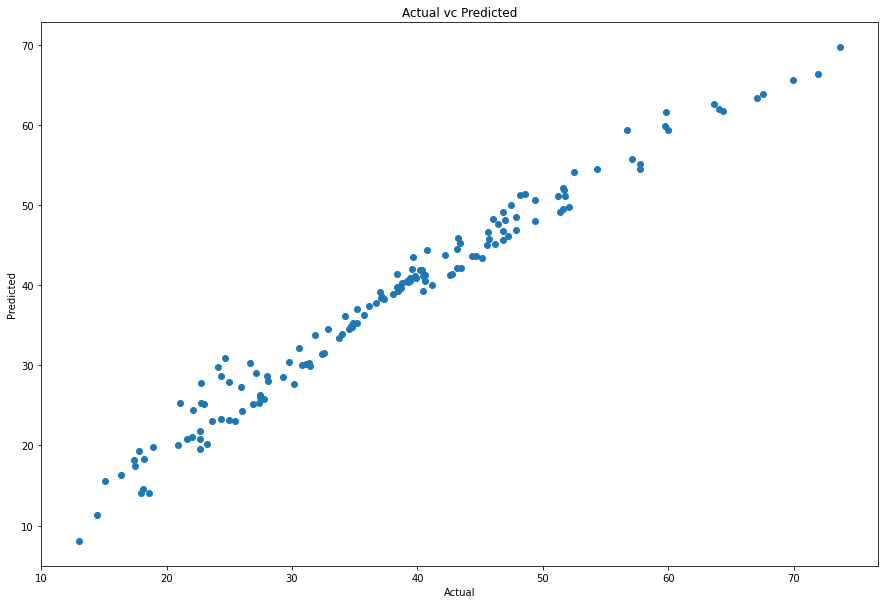

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_mlr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vc Predicted')